<a href="https://colab.research.google.com/github/Ron-Tagne/Heart-Disease-Team-Project/blob/main/From%20Data%20to%20Diagnosis%3A%20Predicting%20Heart%20Health%20with%C2%A0ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color="Orange"> Predict If a Person Has Heart Disease Based on Personal Key Indicators </font>
<br>The objective of the study is to build a Machine Learning model that predicts if person has heart disease based on the given personal health key indicators.<br>The dataset published in [Kaggle - Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [ ]:
"""Importing required libraries"""

import pandas as pd
import numpy as np

import time, math

# libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/MichaelRacanelli/MLgroupproject/main/heart_2020_cleaned.csv")
# df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Now that we stored the data in a datraframe, we will perform the following steps:
1. Understanding the data
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Modelling and Model Analysis
5. Conclusion

##  <font color='orange'>1. UNDERSTANDING THE DATA</font>

Explanation of the variables of the dataset

- **HeartDisease** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- **BMI** : Body Mass Index (BMI).
- **Smoking** : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
- **AlcoholDrinking** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- **Stroke** : (Ever told) (you had) a stroke?
- **PhysicalHealth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- **MentalHealth** : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- **DiffWalking** : Do you have serious difficulty walking or climbing stairs?
- **Sex** : Are you male or female?
- **AgeCategory**: Fourteen-level age category.
- **Race** : Imputed race/ethnicity value.
- **Diabetic** : (Ever told) (you had) diabetes?
- **PhysicalActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- **GenHealth** : Would you say that in general your health is...
- SleepTime** : On average, how many hours of sleep do you get in a 24-hour period?
- **Asthma** : (Ever told) (you had) asthma?
- **KidneyDisease** : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- **SkinCancer** : (Ever told) (you had) skin cancer?

In [ ]:
# check data size
df.shape

(319795, 18)

In [ ]:
# check columns
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
# check data overview/information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# describe numerical data
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
# describe string data
df.describe(include='object').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [ ]:
print('Number of Duplicated Rows: ', df.duplicated().sum())
print('Duplicated Rows Percentage: {}%'.format(np.round(df.duplicated().sum()/len(df),2)*100))

Number of Duplicated Rows:  18078
Duplicated Rows Percentage: 6.0%


##  <font color='orange'>2. EXPLORATORY DATA ANALYSIS (EDA)</font>

In [ ]:
# List of Variables/Features

# target variable
target = 'HeartDisease'
print('Target: ', target)

# categorical features
categorical_features = [column for column in df.columns if df[column].dtype == 'object' and column != target]
print('\nCategorical Features : ', len(categorical_features), ' : ', categorical_features)
# categorical features: Binary
categorical_features_binary =  [col for col in categorical_features if (df[col].dtype==object and df[col].nunique()==2)]
print('Categorical Binary Features: ', len(categorical_features_binary), ' : ', categorical_features_binary)
# categorical features: NonBinary
categorical_features_nonbinary =  [col for col in categorical_features if col not in categorical_features_binary]
print('Categorical Non-Binary Features: ', len(categorical_features_nonbinary), ' : ', categorical_features_nonbinary)

# numerical features
numerical_features = [col for col in df.columns.to_list() if col not in (categorical_features+[target])]
print('\nNumerical Features : ', len(numerical_features), ' : ', numerical_features)

Target:  HeartDisease

Categorical Features :  13  :  ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Categorical Binary Features:  9  :  ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
Categorical Non-Binary Features:  4  :  ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

Numerical Features :  4  :  ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


### Exploratory Data Analysis

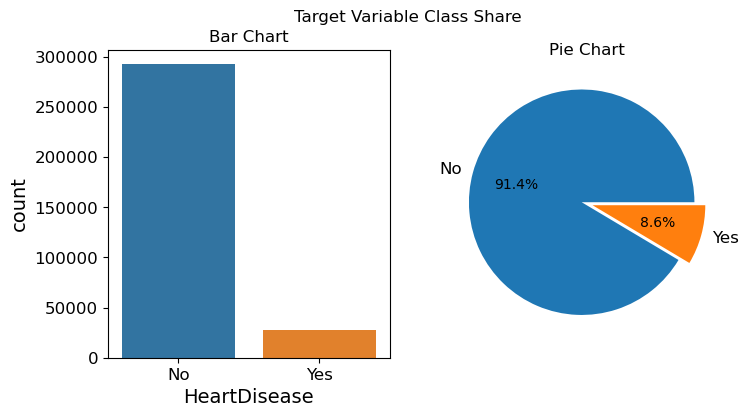

In [ ]:
# custom function to check target variable counts and %share
def check_data_balance(series, fig_size = (8,4)):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=fig_size)
    unique = series.value_counts()

    sns.countplot(x = series, ax = ax1)
    ax1.set_xlabel(target)
    ax1.set_title('Bar Chart')

    ax2.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%')
    ax2.set_title('Pie Chart')

    fig.suptitle('Target Variable Class Share')

check_data_balance(df['HeartDisease'],(8,4));


From the above chart, it shows that we have imbalanced dataset with only 8.6% of the dataset with heart disease.

Visualizing Numerical Features

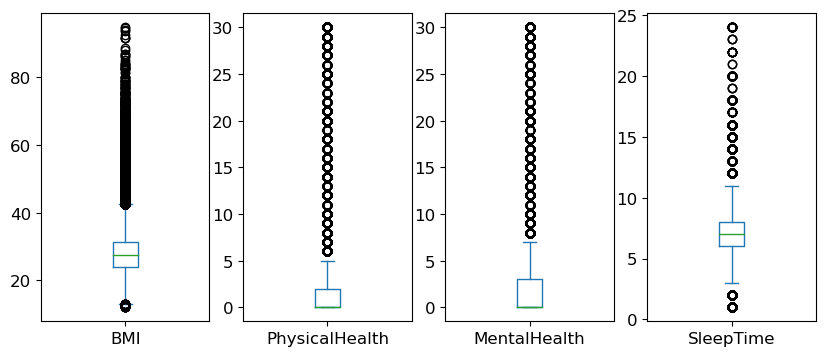

In [ ]:
# boxplot of numerical features
df.plot(kind = "box", figsize = (10,4), subplots = True);

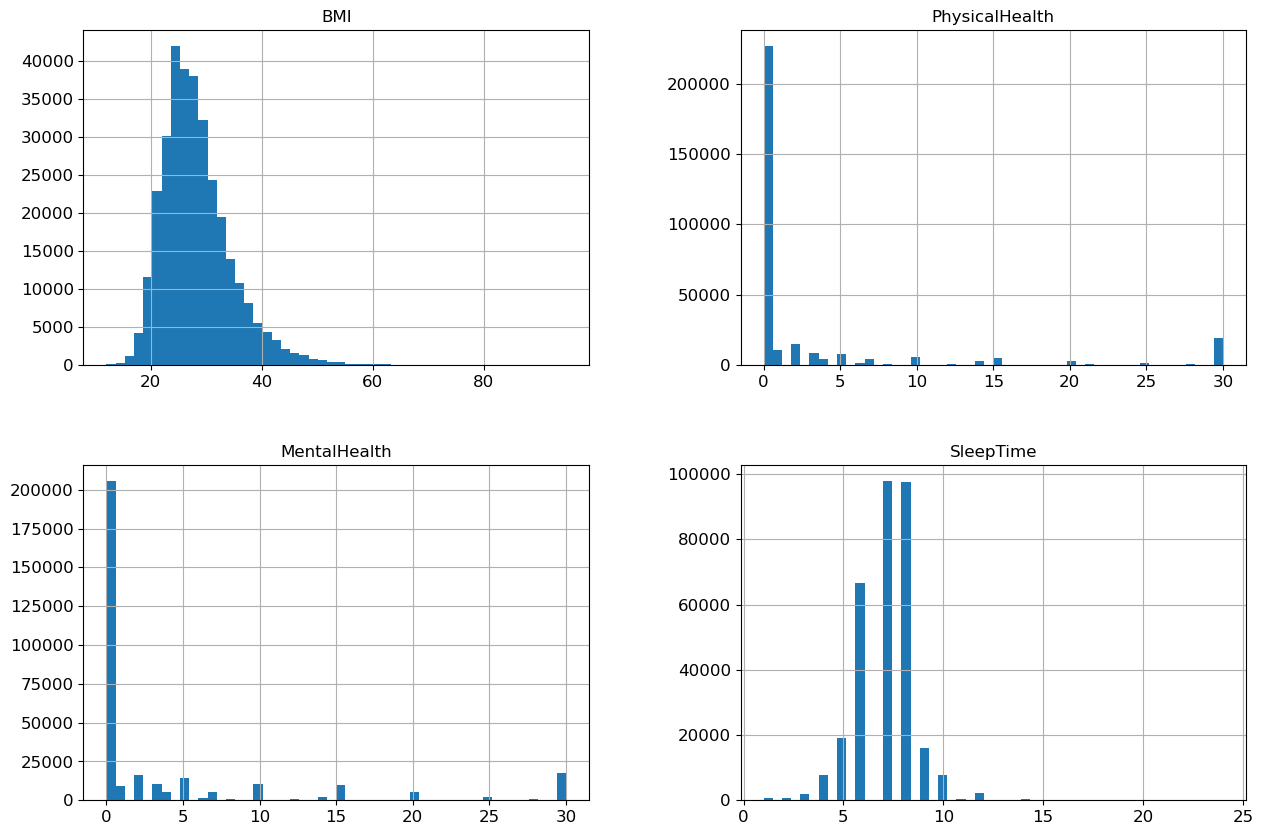

In [ ]:
# Histogram of numerical features
df[numerical_features].hist(bins=50, figsize=(15,10))
plt.show()

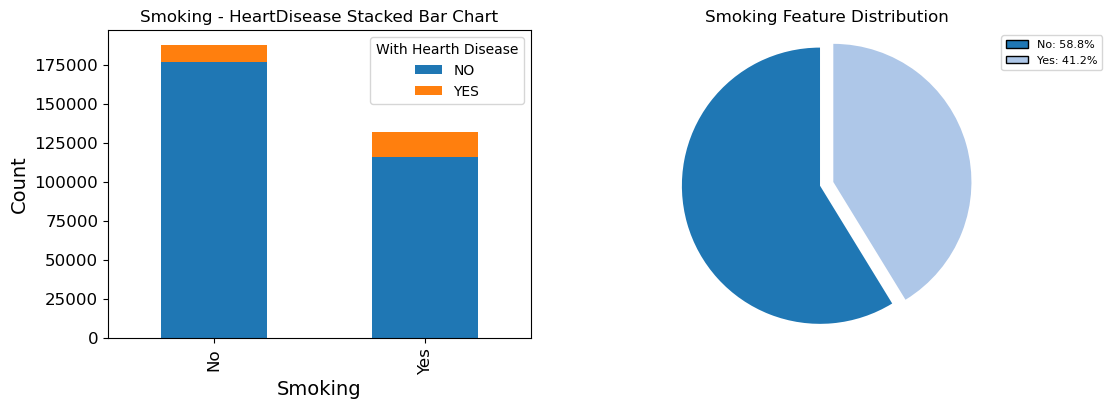

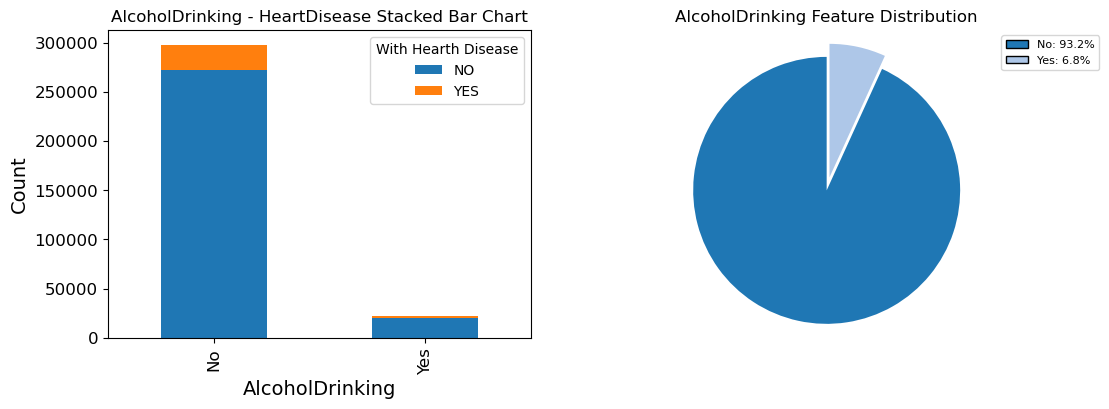

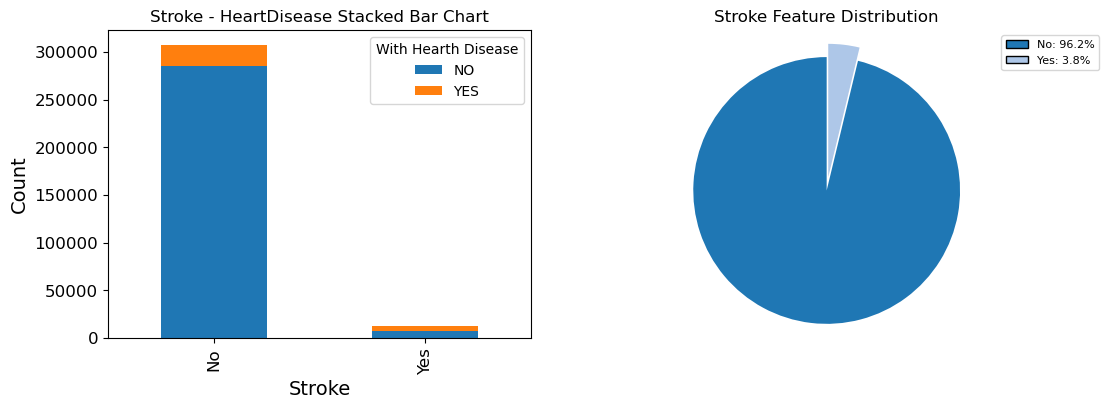

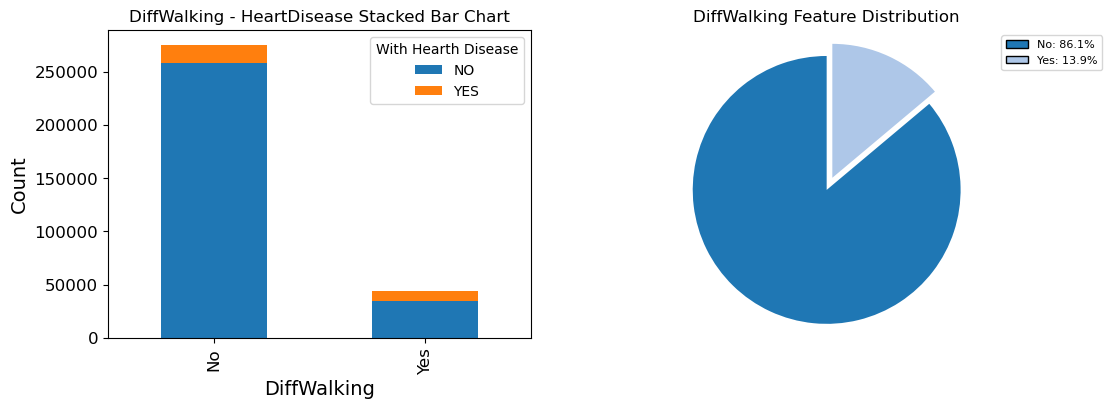

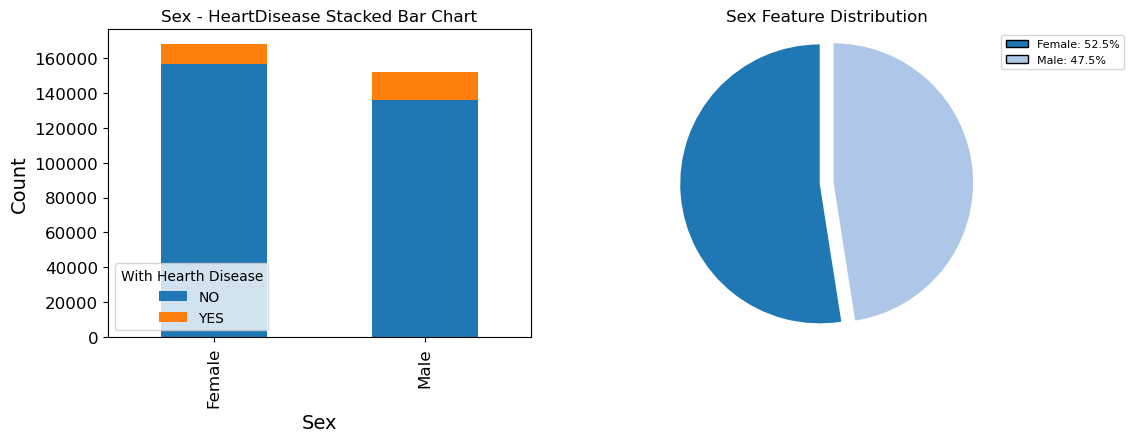

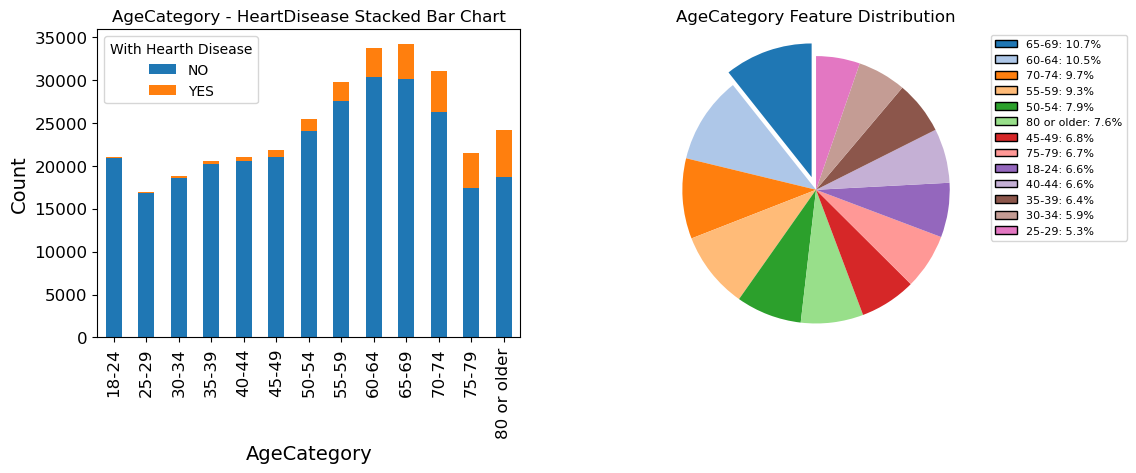

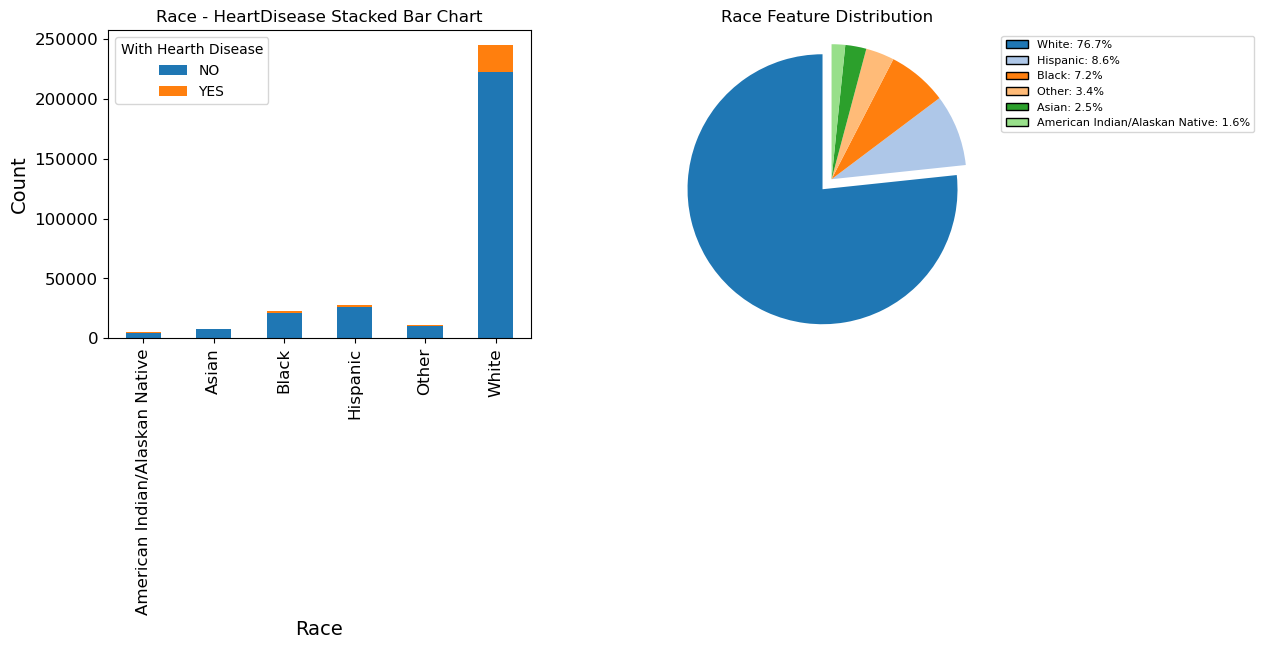

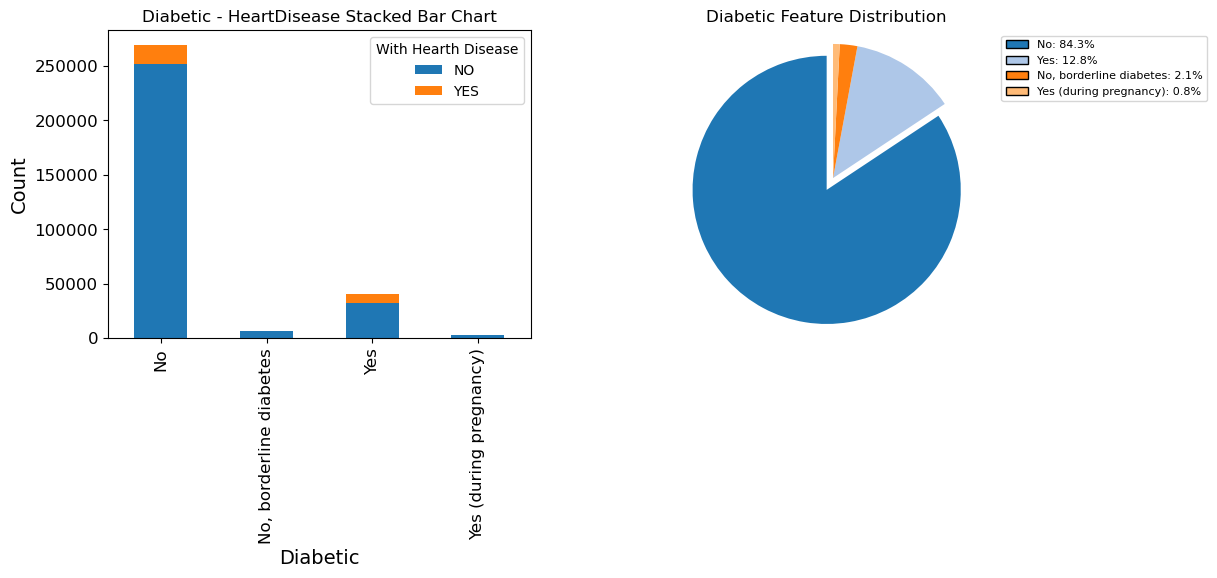

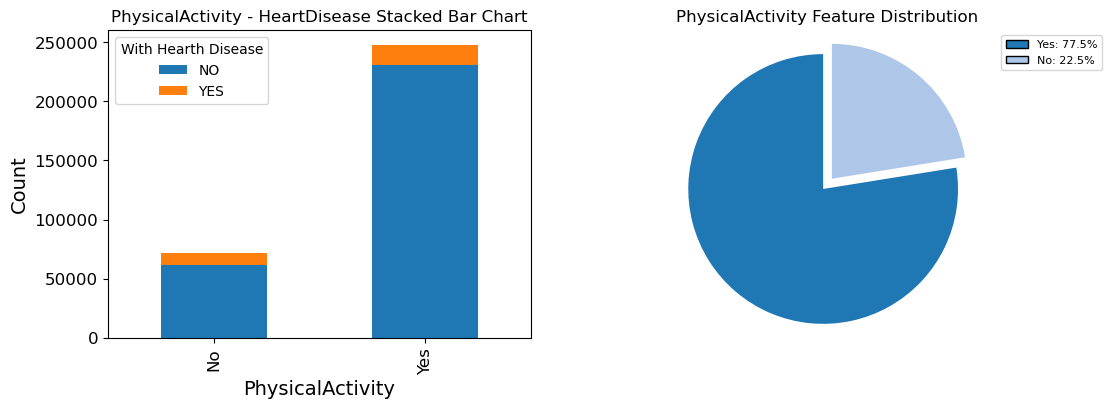

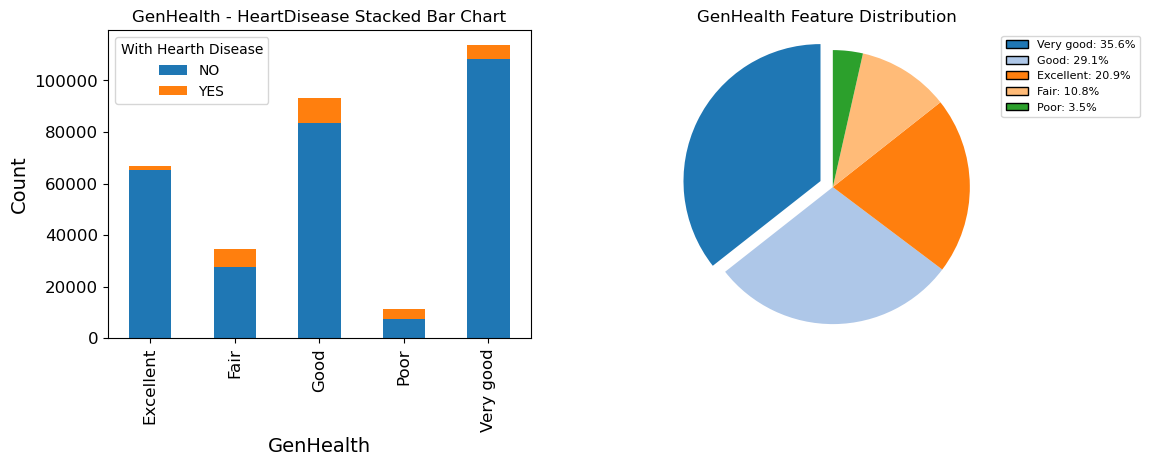

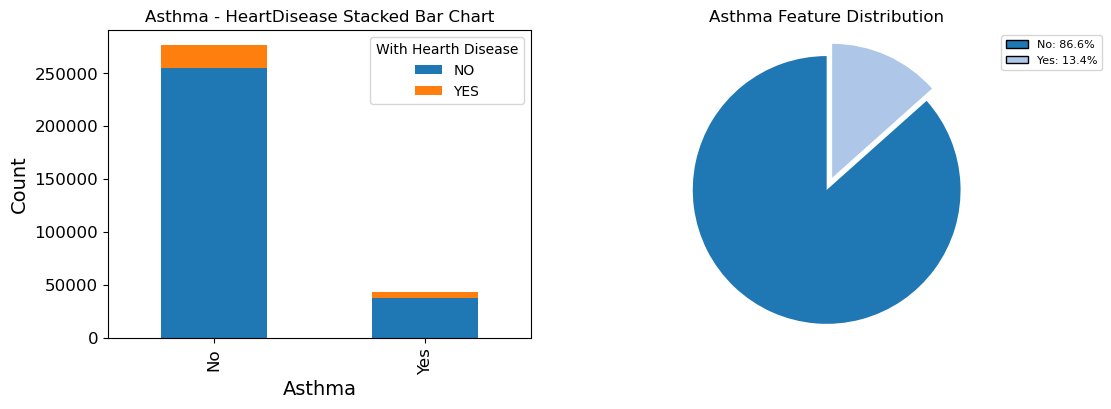

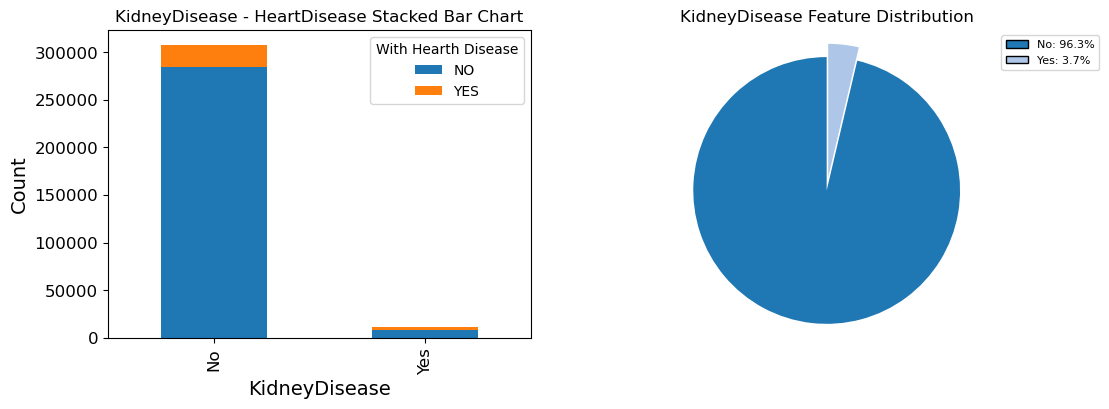

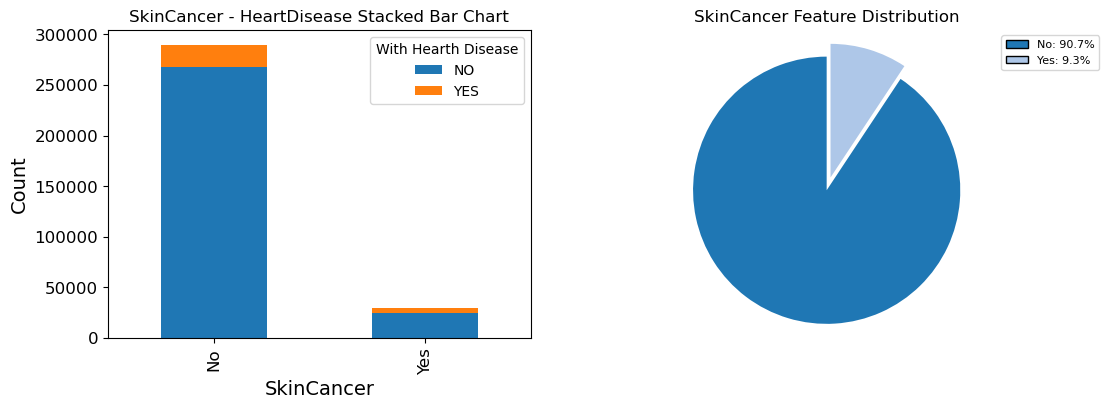

In [ ]:
# plot categorical features
for feature in categorical_features:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

    pd.pivot_table(df[[target, feature]].reset_index(), values='index', index=[feature,target],aggfunc='count').rename(columns={'index':'Count'}).unstack().plot(kind='bar',stacked=True, ax=ax1)
    ax1.legend(['NO', 'YES'], title='With Hearth Disease')
    ax1.set_ylabel('Count')
    ax1.set_title(feature + ' - HeartDisease Stacked Bar Chart')

    #Extract the unique values in the column and their counts
    unique_values = df[feature].value_counts()

    # Calculate the relative frequency of each category
    relative_freq = unique_values / len(df)

    # Choose a colormap with more contrast
    colors = plt.get_cmap('tab20')(range(len(unique_values)))

    # Labels for the pie chart
    labels = unique_values.index.tolist()

    # Explode parameter to highlight the first category
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    ax2.pie(relative_freq, labels=None, colors=colors, explode=explode, autopct='', startangle=90, textprops={'fontsize': 8})
    ax2.set_title(feature + ' Feature Distribution')
    ax2.axis('equal')

    # Create a legend for the pie chart
    legend_elements = [mpatches.Patch(facecolor=color, edgecolor='black', label=f'{label}: {relative_freq[i]*100:.1f}%') for i, (color, label) in enumerate(zip(colors, labels))]
    ax2.legend(handles=legend_elements, title="", bbox_to_anchor=(0.9, 0, 0.5, 1), loc="upper left", fontsize=8)

    # ax2.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%1.1f%%', startangle=90)
    # ax2.set_title(feature + ' Feature Distribution')

    plt.show();

##  <font color='orange'>3. DATA PRE-PROCESSING</font>

### Feature Selection

In [ ]:
# Chi-Square test on categorical features

from scipy.stats import chi2_contingency

def chi_square_test(df, categorical_vars, target):
    results = []

    for feature in categorical_vars:
        contingency_table = pd.crosstab(df[feature], df[target])

        if contingency_table.shape[0] <= 1 or contingency_table.shape[1] <= 1:
            continue

        stat, p_value, dof, expected = chi2_contingency(contingency_table)

        results.append({
            'Feature': feature,
            'Chi-Square Statistic': stat.round(2),
            'p-value': p_value.round(4),
            'Degrees of Freedom': dof
        })

    results_df = pd.DataFrame(results)
    return results_df


results_table = chi_square_test(df, categorical_features, target)
print(results_table)

             Feature  Chi-Square Statistic  p-value  Degrees of Freedom
0            Smoking               3713.03      0.0                   1
1    AlcoholDrinking                328.65      0.0                   1
2             Stroke              12386.49      0.0                   1
3        DiffWalking              12951.15      0.0                   1
4                Sex               1568.31      0.0                   1
5        AgeCategory              19299.92      0.0                  12
6               Race                844.31      0.0                   5
7           Diabetic              10959.86      0.0                   3
8   PhysicalActivity               3199.01      0.0                   1
9          GenHealth              21542.18      0.0                   4
10            Asthma                548.85      0.0                   1
11     KidneyDisease               6739.23      0.0                   1
12        SkinCancer               2783.64      0.0             

These results are the output of the chi-square test for independence conducted on each categorical feature with respect to the target variable 'HeartDisease.'

**Smoking:**<br>
Chi-Square Statistic: 3713.03
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is extremely small, indicating strong evidence against the null hypothesis of independence between Smoking and HeartDisease. The chi-square statistic shows a significant association between these two variables.

**AlcoholDrinking:**<br>
Chi-Square Statistic: 328.65
p-value: 1.89E-73 (practically zero)
Degrees of Freedom: 1
The p-value is very close to zero, suggesting a highly significant relationship between AlcoholDrinking and HeartDisease.

**Stroke:**<br>
Chi-Square Statistic: 12386.49
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is extremely small, indicating strong evidence against the null hypothesis of independence between Stroke and HeartDisease. The chi-square statistic shows a significant association between these two variables.

**DiffWalking:**<br>
Chi-Square Statistic: 12951.15
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is practically zero, suggesting a highly significant relationship between DiffWalking and HeartDisease.

**Sex:**<br>
Chi-Square Statistic: 1568.31
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is very small, indicating a significant association between Sex and HeartDisease.

**AgeCategory:**<br>
Chi-Square Statistic: 19299.92
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 12
The p-value is extremely small, indicating strong evidence against the null hypothesis of independence between AgeCategory and HeartDisease. The chi-square statistic shows a significant association between these two variables.

**Race:**<br>
Chi-Square Statistic: 844.31
p-value: 2.99E-180 (practically zero)
Degrees of Freedom: 5
The p-value is extremely small, indicating strong evidence against the null hypothesis of independence between Race and HeartDisease. The chi-square statistic shows a significant association between these two variables.

**Diabetic:**<br>
Chi-Square Statistic: 10959.86
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 3
The p-value is practically zero, suggesting a highly significant relationship between Diabetic and HeartDisease.

**PhysicalActivity:**<br>
Chi-Square Statistic: 3199.01
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is very small, indicating a significant association between PhysicalActivity and HeartDisease.

**GenHealth:**<br>
Chi-Square Statistic: 21542.18
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 4
The p-value is extremely small, indicating strong evidence against the null hypothesis of independence between GenHealth and HeartDisease. The chi-square statistic shows a significant association between these two variables.

**Asthma:**<br>
Chi-Square Statistic: 548.85
p-value: 2.24E-121 (practically zero)
Degrees of Freedom: 1
The p-value is extremely small, indicating strong evidence against the null hypothesis of independence between Asthma and HeartDisease. The chi-square statistic shows a significant association between these two variables.

**KidneyDisease:**<br>
Chi-Square Statistic: 6739.23
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is practically zero, suggesting a highly significant relationship between KidneyDisease and HeartDisease.

**SkinCancer:**<br>
Chi-Square Statistic: 2783.64
p-value: 0.00E+00 (practically zero)
Degrees of Freedom: 1
The p-value is practically zero, suggesting a highly significant relationship between SkinCancer and HeartDisease.

In conclusion, all the categorical features have extremely low p-values, indicating significant associations with the target variable 'HeartDisease.' This implies that each categorical feature provides valuable information for predicting heart disease, and we should consider them as important factors in your predictive model.

In [ ]:
# Mann-Whitney U test for Numerical Features
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df, quantitative, target):
    results = []
    for feature in quantitative:
        group_0 = df[df[target] == 'No'][feature]
        group_1 = df[df[target] == 'Yes'][feature]

        stat, p_value = mannwhitneyu(group_0, group_1)

        results.append({
            'Feature': feature,
            'Mann-Whitney U': stat.round(3),
            'p-value': p_value.round(3)
        })
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
numerical_stat_test = mann_whitney_u_test(df, numerical_features, target)
print(numerical_stat_test)

          Feature  Mann-Whitney U  p-value
0             BMI    3.528521e+09    0.000
1  PhysicalHealth    3.054079e+09    0.000
2    MentalHealth    4.026615e+09    0.051
3       SleepTime    3.942217e+09    0.000


In this study, the Mann-Whitney U test (Wilcoxon rank-sum test) was appropriately chosen to evaluate the statistical significance of differences in the distributions of quantitative features between two distinct groups: individuals with and without heart disease. The Mann-Whitney U test is a non-parametric test and is particularly suitable for cases where the data may not follow a normal distribution, which is often the case for highly imbalanced datasets and skewed quantitative variables.

The results of the Mann-Whitney U test for each quantitative feature are as follows:

1) BMI: The Mann-Whitney U statistic of 3.53E+09 and a p-value of 0.00 indicate a significant difference in the distribution of BMI between individuals with and without heart disease. This suggests that BMI might serve as a differentiating factor for heart disease prediction.

2) PhysicalHealth: The Mann-Whitney U statistic of 3.05E+09 and a p-value of 0.00 show a significant difference in the distribution of physical health scores between the two groups. This implies that the assessment of physical health may have predictive value in identifying individuals at risk of heart disease.

3) MentalHealth: The Mann-Whitney U statistic of 4.03E+09 and a p-value of 0.05 reveal a marginal difference in the distribution of mental health scores between individuals with and without heart disease. While the p-value is close to the commonly used threshold of 0.05 for statistical significance, further investigation and consideration of domain-specific knowledge are necessary to ascertain the potential relevance of mental health in predicting heart disease.

4) SleepTime: The Mann-Whitney U statistic of 3.94E+09 and a p-value of 0.00 indicate a significant difference in the distribution of sleep duration between the two groups. This suggests that sleep duration may be a relevant predictor in identifying individuals susceptible to heart disease.

In summary, the Mann-Whitney U test provided valuable insights into the differences in quantitative features between individuals with and without heart disease. The statistically significant results for BMI, PhysicalHealth, and SleepTime imply that these variables have potential as predictive indicators of heart disease. However, further analysis and careful consideration of domain-specific knowledge are necessary to interpret the clinical implications of these findings accurately.

Overall, the application of the Mann-Whitney U test enhances the validity of our analysis, especially given the skewed nature of the quantitative variables and the imbalance in the target variable. These findings contribute to a deeper understanding of the relationships between the studied variables and can aid in developing robust models for heart disease prediction.

### Data Pipelines

In [ ]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder #specific transformations we want to use in our pipelines

# scale numerical features using MixMaxScaler()
pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

# One Hot Encoding for NON-BINARY categorical features
pipeline_categorical_nonbinary = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# OrdinalEncoder instead of LabelEncoder for BINARY categorical features to allow passing of multiple columns
pipeline_categorical_binary = Pipeline([
  ('OE', OrdinalEncoder()),
])

In [ ]:
# copy the df dataframe
data = df.copy()

In [ ]:
# tranform the target variable to numeric (0,1) using LabelEncoder()
from sklearn.preprocessing import LabelEncoder

data[target] = LabelEncoder().fit_transform(data[target])

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = data[categorical_features+numerical_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) #stratified sampling based on the target since we don't apply data balancing
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (239846, 17)
X_test.shape: (79949, 17)
y_train.shape: (239846,)
y_test.shape: (79949,)


In [ ]:
# Transform the data using the pipeline

# Create the ColumnTransformer to apply different transformers to numerical and categorical features
pipeline_full = ColumnTransformer([
  ("categorical_nonbinary", pipeline_categorical_nonbinary, categorical_features_nonbinary),
  ("categorical_binary", pipeline_categorical_binary, categorical_features_binary),
  ("numerical", pipeline_numerical, numerical_features)
])

pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (239846, 41)
X_test_transformed.shape: (79949, 41)


##  <font color='orange'>4. MODELLING AND MODEL ANALYSIS</font>

In [ ]:
# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# custom fuction calculating single model performance scores
# the model should already been fitted/trained
def test_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    scorer = {
        'accuracy' : accuracy_score(y_test, y_pred),
        'precision' : precision_score(y_test, y_pred),
        'recall' : recall_score(y_test, y_pred),
        'f1' : f1_score(y_test, y_pred)
        }
    scores = {}
    for score in scorer:
        scores[score] = [scorer[score]]
    return scores

# custom function to train and test each model for a given dataset
def evaluate_models(models, X_train, X_test, y_train, y_test):
    score_list = []
    for model_name, clf in models :
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score_list.append((pd.Series({
                            "Precision" : precision_score(y_test, y_pred),
                            "Recall" : recall_score(y_test, y_pred),
                            "F1" : f1_score(y_test, y_pred),
                            "Accuracy" : accuracy_score(y_test, y_pred)},
                            name = model_name)))
    score_list = pd.DataFrame(score_list).T
    score_list['Mean Score'] = score_list.mean(axis=1)
    return score_list

# model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

LR = LogisticRegression(max_iter=10000, random_state=42)
KNN_5 = KNeighborsClassifier(n_neighbors=5)
KNN_10 = KNeighborsClassifier(n_neighbors=10)
KNN_20 = KNeighborsClassifier(n_neighbors=20)
KNN_50 = KNeighborsClassifier(n_neighbors=50)
KNN_100 = KNeighborsClassifier(n_neighbors=100)
RFC = RandomForestClassifier(random_state=42)
DTC = DecisionTreeClassifier(random_state=42)
ETC = ExtraTreesClassifier(random_state=42)
XGB = XGBClassifier()
SVClf = SVC(random_state=42)

models = [
    ('LogReg', LR),
    ('KNN 5 Neighbors', KNN_5),
    ('KNN 10 Neighbors', KNN_10),
    ('KNN 20 Neighbors', KNN_20),
    ('KNN 50 Neighbors', KNN_50),
    ('KNN 100 Neighbors', KNN_100),
    ('RFC', RFC),
    ('DTC', DTC),
    ('ETC', ETC),
    ('XGB', XGB),
    ('SVC', SVClf)
    ]

models_no_svc = [
    ('LogReg', LR),
    ('KNN 5 Neighbors', KNN_5),
    ('KNN 10 Neighbors', KNN_10),
    ('KNN 20 Neighbors', KNN_20),
    ('KNN 50 Neighbors', KNN_50),
    ('KNN 100 Neighbors', KNN_100),
    ('RFC', RFC),
    ('DTC', DTC),
    ('ETC', ETC),
    ('XGB', XGB)
    ]

In [ ]:
# function to highlight the model with highest score per metric
def highlight_max_score(s):
    is_max = s == s.max()
    return ['background-color: blue; font-weight: bold; color: white' if v else '' for v in is_max]

In [ ]:
# function to plot model's learning curve
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    return plt

### EVALUATE THE MODELS USING UNBALANCED DATA

In [ ]:
start_time = start_time = time.time() #execution start time
result_unbalanced = evaluate_models(models_no_svc, # excluding SVC() due to training time
                        X_train_transformed, X_test_transformed, y_train, y_test)
print('Time elapsed for training unbalanced dataset: {:.0f} minutes {:.0f} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training unbalanced dataset: 1 minutes 44 seconds


In [ ]:
result_unbalanced.style.apply(highlight_max_score,axis=1)

,LogReg,KNN 5 Neighbors,KNN 10 Neighbors,KNN 20 Neighbors,KNN 50 Neighbors,KNN 100 Neighbors,RFC,DTC,ETC,XGB,Mean Score
Precision,0.551988,0.358900,0.460568,0.514535,0.566038,0.637771,0.322240,0.225693,0.285163,0.532703,0.445560
Recall,0.105509,0.125822,0.064007,0.051732,0.035072,0.030104,0.116031,0.242876,0.162063,0.098787,0.103200
F1,0.177156,0.186323,0.112394,0.094011,0.066052,0.057494,0.170624,0.233969,0.206672,0.166667,0.147136
Accuracy,0.916109,0.905940,0.913470,0.914658,0.915108,0.915521,0.903451,0.863876,0.893507,0.915446,0.905709


### DATA BALANCING

Data balancing using random "Under-Sampling" technique.
<br>_Balancing the dataset by randomly deleting the majority class_

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# handling the class imbalance
rus = RandomUnderSampler(random_state = 42)
X_train_transformed_rus, y_train_transformed_rus = rus.fit_resample(X_train_transformed, y_train)

start_time = start_time = time.time() #execution start time
result_rus = evaluate_models(models, #including SVC() as it trains faster with fewer samples
                        X_train_transformed_rus, X_test_transformed, y_train_transformed_rus, y_test)
print('Time elapsed for training balanced dataset using RandomUnderSampler(): {:.0f} minutes {:.0f} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training balanced dataset using RandomUnderSampler(): 3 minutes 23 seconds


In [ ]:
result_rus.style.apply(highlight_max_score,axis=1)

,LogReg,KNN 5 Neighbors,KNN 10 Neighbors,KNN 20 Neighbors,KNN 50 Neighbors,KNN 100 Neighbors,RFC,DTC,ETC,XGB,SVC,Mean Score
Precision,0.224003,0.198517,0.221530,0.219956,0.216686,0.215008,0.196526,0.161631,0.187516,0.210826,0.213324,0.205957
Recall,0.778167,0.727459,0.706708,0.742218,0.767061,0.777145,0.765600,0.666082,0.740611,0.788835,0.801111,0.751000
F1,0.347869,0.311915,0.337321,0.339347,0.337915,0.336827,0.312767,0.260138,0.299262,0.332727,0.336929,0.323001
Accuracy,0.750278,0.725287,0.762336,0.752642,0.742723,0.738071,0.712029,0.675706,0.703136,0.729190,0.730115,0.729229


Data balancing using "Over-Sampling" technique SMOTE (Intelligently).
<br>_It generates the virtual training records by linear interpolation for the minority class._

In [ ]:
from imblearn.over_sampling import SMOTE

# handling the class imbalance
smt = SMOTE(random_state = 42)
X_train_transformed_sm, y_train_transformed_sm = smt.fit_resample(X_train_transformed,y_train)

start_time = start_time = time.time() #execution start time
result_sm = evaluate_models(models_no_svc, # excluding SVC() due to training time
                        X_train_transformed_sm, X_test_transformed, y_train_transformed_sm, y_test)
print('Time elapsed for training balanced dataset using SMOTE(): {:.0f} minutes {:.0f} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training balanced dataset using SMOTE(): 3 minutes 39 seconds


In [ ]:
result_sm.style.apply(highlight_max_score,axis=1)

,LogReg,KNN 5 Neighbors,KNN 10 Neighbors,KNN 20 Neighbors,KNN 50 Neighbors,KNN 100 Neighbors,RFC,DTC,ETC,XGB,Mean Score
Precision,0.221535,0.211634,0.217023,0.213936,0.204863,0.201608,0.274643,0.209074,0.245936,0.316474,0.231672
Recall,0.784744,0.505626,0.557796,0.663598,0.748648,0.787958,0.278094,0.304399,0.289639,0.252375,0.517288
F1,0.345526,0.298379,0.312472,0.323560,0.321695,0.321067,0.276358,0.247888,0.266005,0.280813,0.299376
Accuracy,0.745550,0.796470,0.789904,0.762511,0.729778,0.714768,0.875346,0.841899,0.863188,0.889354,0.800877


Data balancing using "Under-Sampling" using Tomek Links Technique (Intelligently).

In [ ]:
from imblearn.under_sampling import TomekLinks

# handling the class imbalance
tl = TomekLinks()
X_train_transformed_tl, y_train_transformed_tl = tl.fit_resample(X_train_transformed,y_train)

start_time = start_time = time.time() #execution start time
result_tl = evaluate_models(models_no_svc, # excluding SVC() due to training time
                        X_train_transformed_tl, X_test_transformed, y_train_transformed_tl, y_test)
print('Time elapsed for training balanced dataset using TomekLinks(): {:.0f} minutes {:.0f} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training balanced dataset using TomekLinks(): 1 minutes 42 seconds


In [ ]:
result_tl.style.apply(highlight_max_score,axis=1)

,LogReg,KNN 5 Neighbors,KNN 10 Neighbors,KNN 20 Neighbors,KNN 50 Neighbors,KNN 100 Neighbors,RFC,DTC,ETC,XGB,Mean Score
Precision,0.507049,0.347704,0.438308,0.462709,0.516495,0.553109,0.331815,0.225872,0.282084,0.497756,0.416290
Recall,0.147158,0.181499,0.109017,0.088850,0.073214,0.062400,0.180915,0.276341,0.227093,0.145842,0.149233
F1,0.228112,0.238502,0.174605,0.149074,0.128248,0.112147,0.234159,0.248570,0.251619,0.225588,0.199063
Accuracy,0.914758,0.900799,0.911781,0.913182,0.914808,0.915434,0.898710,0.856996,0.884376,0.914295,0.902514


Data balancing using combination "Under-Sampling" and "Over-Sampling" using Tomek Links SMOTETomek.

In [ ]:
from imblearn.combine import SMOTETomek

# handling the class imbalance
smt_tl = SMOTETomek(random_state = 42)
X_train_transformed_smt_tl, y_train_transformed_smt_tl = smt_tl.fit_resample(X_train_transformed,y_train)

start_time = start_time = time.time() #execution start time
result_smt_tl = evaluate_models(models_no_svc, # excluding SVC() due to training time
                        X_train_transformed_smt_tl, X_test_transformed, y_train_transformed_smt_tl, y_test)
print('Time elapsed for training balanced dataset using SMOTETomek(): {:.0f} minutes {:.0f} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training balanced dataset using SMOTETomek(): 3 minutes 25 seconds


In [ ]:
result_smt_tl.style.apply(highlight_max_score,axis=1)

,LogReg,KNN 5 Neighbors,KNN 10 Neighbors,KNN 20 Neighbors,KNN 50 Neighbors,KNN 100 Neighbors,RFC,DTC,ETC,XGB,Mean Score
Precision,0.220812,0.211842,0.217141,0.213428,0.204601,0.201569,0.273114,0.210416,0.242738,0.315350,0.231101
Recall,0.785474,0.513956,0.567587,0.669882,0.753763,0.792343,0.290516,0.308198,0.294315,0.264796,0.524083
F1,0.344717,0.300021,0.314112,0.323717,0.321842,0.321380,0.281547,0.250089,0.266050,0.287870,0.301135
Accuracy,0.744400,0.794732,0.787840,0.760435,0.728114,0.713592,0.873094,0.841799,0.861011,0.887866,0.799288


Using the balanced data results in a lower accuracy, but with much better precision and recall and f1 score. This makes sense because the model is making way fewer false negative predictions by being overly skewed to predict a negative diagnosis of heart disease, which was the majority class in the unbalanced dataset.

Considering our problem of predicting heart disease, a false negative would have grave consequences, so we should use a balanced dataset going forward and prioritizing a higher **Recall** score over just raw accuracy.

We will use **recall_score** as our main metric for evaluating model performance.
<br>We will focus on identifying **True Positives**. Recall measures the ability of our model to correctly identify individuals with a Heart Disease among all the actual positive cases.
<br>In our context, false negatives could have severe implications for people's health and lives. Maximizing Recall ensures that we are sensitive enough to capture as many true positive cases as possible, minimizing the risk of missing individuals who need immediate medical attention.
<br>Minimizing False Negatives: A false negative means that a person with a Heart Disease is predicted as healthy, leading to delayed or missed treatment.
<br>By prioritizing Recall, we aim to reduce the number of false negatives and, consequently, improve patient outcomes.
<br>Trade-Off with False Positives: We should note that maximizing Recall may result in an increase in false positives (predicting someone has a Heart Disease when they don't). However, false positives can be further examined through additional tests or medical analysis, minimizing the potential negative impact on patients' lives.

IMPROVE MODEL PERFORMANCE BY FEATURE ENGINEERING

In [ ]:
# copy the original dataframe
data_engineered = df.copy()
# change target variable to numeric
data_engineered[target] = LabelEncoder().fit_transform(data_engineered[target])
data_engineered.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Feature Engineering: **AgeCategory**

In [ ]:
# Feature engineer the predictor 'AgeCategory' to numerical (ordinal)
# Create a mapping of age categories to their midpoint values
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82  # Assuming '80 or older' is around 85-84 years old, set the midpoint as 82.
}

# Replace the age categories with their numerical midpoint values
data_engineered['AgeCategory'] = data_engineered['AgeCategory'].map(age_mapping)

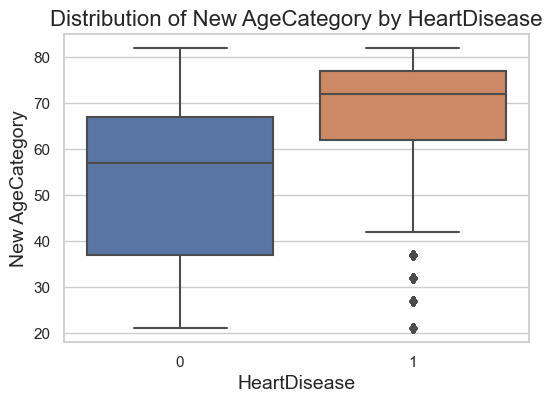

In [ ]:
# Box plot to evaluate the new AgeCategory as predictor of HeartDisease

# Set style and create box plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.boxplot(x='HeartDisease', y='AgeCategory', data=data_engineered)
plt.title("Distribution of New AgeCategory by HeartDisease", fontsize=16)
plt.xlabel("HeartDisease", fontsize=14)
plt.ylabel("New AgeCategory", fontsize=14)
plt.show()

In [ ]:
# Conducting statistical test for new AgeCategory using T-test
import scipy.stats as stats

# Separate the 'AgeCategory' values for each class of 'HeartDisease'
age_category_yes = data_engineered[data_engineered['HeartDisease'] == 1]['AgeCategory']
age_category_no = data_engineered[data_engineered['HeartDisease'] == 0]['AgeCategory']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(age_category_yes, age_category_no, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine the significance level
alpha = 0.05

# Evaluate the hypothesis
if p_value < alpha:
    print("The means of new 'AgeCategory' for the two groups are significantly different.")
else:
    print("There is no significant difference in the means of 'AgeCategory' for the two groups.")

T-Statistic: 187.0196468962189
P-Value: 0.0
The means of new 'AgeCategory' for the two groups are significantly different.


The t-test resulted in a t-statistic of approximately 187.02. This value represents the difference between the means of the two groups in terms of standard error units. A larger absolute t-statistic value indicates a greater difference between the means of the two groups.

The p-value associated with the t-test is 0.0, which means that the probability of obtaining the observed difference in means (or a more extreme difference) by random chance alone is essentially zero. A p-value of 0.0 indicates an extremely strong level of statistical significance.

With such a low p-value, we can confidently reject the null hypothesis, which assumes that there is no significant difference between the means of 'AgeNumerical' for the two groups. The results suggest that there is a significant difference in the 'AgeNumerical' values between the groups with and without heart disease.

In summary, the t-test indicates that the means of 'AgeNumerical' for the two groups ('Yes' and 'No' for 'HeartDisease') are significantly different. This finding supports the idea that 'AgeNumerical' can be a good predictor of 'HeartDisease', as the ages of respondents with heart disease appear to be significantly different from those without heart disease.

Feature Engineering: **BMI**

In [ ]:
# converting BMI to categorical WHO reference
bmi_bin = [0,16,18.4,24.9,29.9,34.9,39.9,100]
bmi_group = ['severely underweight','underweight','normal weight','overweight','moderately obese','severely obese','morbidly obese']
data_engineered['BMI'] = pd.cut(data_engineered['BMI'], bmi_bin, right=False, labels = bmi_group)

data_engineered['BMI'] = data_engineered['BMI'].map(
    {
        'severely underweight' : 16,
        'underweight' : 18.4,
        'normal weight' : 24.9,
        'overweight' : 29.9,
        'moderately obese' : 34.9,
        'severely obese' : 39.9,
        'morbidly obese' : 44.9
    }
)

data_engineered['BMI']  = data_engineered['BMI'] .astype(int)

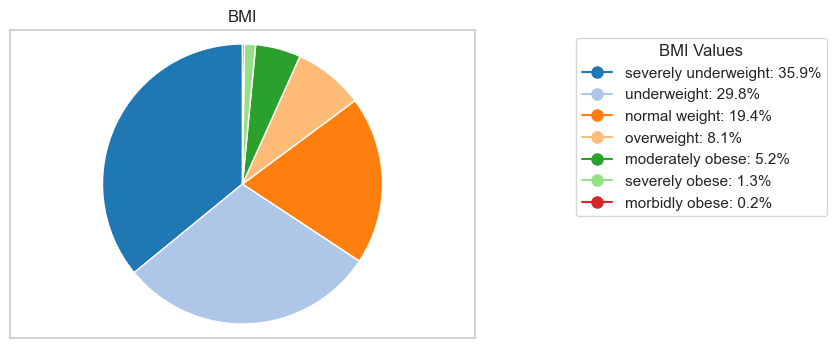

In [ ]:
plt.figure(figsize=(6, 4))

# Relative frequency of each category
relative_freq = data_engineered['BMI'].value_counts(normalize=True)

# Custom colormap
colormap = 'tab20'
colors = plt.get_cmap(colormap)(range(len(relative_freq)))

# Plot the pie chart
pie, _, _ = plt.pie(relative_freq, autopct='', startangle=90, colors=colors)
plt.title('BMI')
legend_values = [f'{val:.1f}%' for val in relative_freq * 100]

plt.legend(pie, bmi_group, title='BMI Categories', bbox_to_anchor=(1, 1), loc='upper left')

# Create a box with legends and values
plt.box(on=None)
legend_elements = [plt.Line2D([0], [0], marker='o', markersize=8, color=color, label=f'{label}: {value}') for label, value, color in zip(bmi_group, legend_values, colors)]
plt.legend(handles=legend_elements, title='BMI Values', bbox_to_anchor=(1.2, 1), loc='upper left')

plt.axis('equal')
plt.show()

In [ ]:
# Chi-squared test

# Create the contingency table
contingency_table = pd.crosstab(data_engineered['BMI'], data_engineered['HeartDisease'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)

Chi-squared test statistic: 1003.8082445951538
p-value: 1.3419964106465705e-213


The test statistic has a large value of 1003.808, indicating a significant association between BMI and Heart Disease.

The p-value obtained from the test is 1.34e-213, which is extremely close to zero. A very small p-value suggests that the observed association between BMI and Heart Disease is unlikely to have occurred by chance alone. Therefore, we can reject the null hypothesis, which states that there is no association between BMI and Heart Disease.

In conclusion, the results of the chi-squared test indicate that BMI is a good predictor of the binary target 'HeartDisease.' This means that BMI is likely to have a significant influence on the likelihood of a person having heart disease.

In [ ]:
# List of new Variables/Features

# target variable
target = 'HeartDisease'
print('Target: ', target)

# categorical features
categorical_features = [column for column in data_engineered.columns if data_engineered[column].dtype == 'object'  and column != target]
print('\nCategorical Features : ', len(categorical_features), ' : ', categorical_features)
# categorical features: Binary
categorical_features_binary =  [col for col in categorical_features if (data_engineered[col].dtype==object and data_engineered[col].nunique()==2)]
print('Categorical Binary Features: ', len(categorical_features_binary), ' : ', categorical_features_binary)
# categorical features: NonBinary
categorical_features_nonbinary =  [col for col in categorical_features if col not in categorical_features_binary]
print('Categorical Non-Binary Features: ', len(categorical_features_nonbinary), ' : ', categorical_features_nonbinary)

# numerical features
numerical_features = [col for col in data_engineered.columns.to_list() if col not in (categorical_features+[target])]
print('\nNumerical Features : ', len(numerical_features), ' : ', numerical_features)

Target:  HeartDisease

Categorical Features :  12  :  ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Categorical Binary Features:  9  :  ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
Categorical Non-Binary Features:  3  :  ['Race', 'Diabetic', 'GenHealth']

Numerical Features :  5  :  ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']


In [ ]:
X_new = data_engineered[categorical_features+numerical_features]
y_new = data_engineered[target]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target since we don't apply data balancing
print(f"X_train.shape: {X_train_new.shape}")
print(f"X_test.shape: {X_test_new.shape}")
print(f"y_train.shape: {y_train_new.shape}")
print(f"y_test.shape: {y_test_new.shape}")

X_train.shape: (239846, 17)
X_test.shape: (79949, 17)
y_train.shape: (239846,)
y_test.shape: (79949,)


In [ ]:
# Create the Pipepline ColumnTransformer to apply different transformers to numerical and categorical features
pipeline_full_new = Pipeline(
                      steps = [('preprocessor', ColumnTransformer([
                                                        ("categorical_nonbinary", pipeline_categorical_nonbinary, categorical_features_nonbinary),
                                                        ("categorical_binary", pipeline_categorical_binary, categorical_features_binary),
                                                        ("numerical", pipeline_numerical, numerical_features)
                                                      ])
                              )]).fit(X_train_new)

# Transform the new dataframe using the new pipeline to get the preprocessed DataFrame
X_train_transformed_new = pipeline_full_new.transform(X_train_new)
X_test_transformed_new = pipeline_full_new.transform(X_test_new)
print(f"X_train_transformed_new.shape: {X_train_transformed_new.shape}")
print(f"X_test_transformed_new.shape: {X_test_transformed_new.shape}")

X_train_transformed_new.shape: (239846, 29)
X_test_transformed_new.shape: (79949, 29)


In [ ]:
# Get the transformed feature names after the pipeline, will be used to identify the features after they have been processed by the pipeline
# Need this because after processing with the pipeline, the data is no longer a pandas dataframe but a simple array with no labelled columns
transformed_feature_names = numerical_features + \
                            list(pipeline_full_new.named_steps['preprocessor'].named_transformers_['categorical_nonbinary']['onehot'].get_feature_names_out(categorical_features_nonbinary)) + \
                            list(pipeline_full_new.named_steps['preprocessor'].named_transformers_['categorical_binary']['OE'].get_feature_names_out(categorical_features_binary))
transformed_feature_names

['BMI',
 'PhysicalHealth',
 'MentalHealth',
 'AgeCategory',
 'SleepTime',
 'Race_American Indian/Alaskan Native',
 'Race_Asian',
 'Race_Black',
 'Race_Hispanic',
 'Race_Other',
 'Race_White',
 'Diabetic_No',
 'Diabetic_No, borderline diabetes',
 'Diabetic_Yes',
 'Diabetic_Yes (during pregnancy)',
 'GenHealth_Excellent',
 'GenHealth_Fair',
 'GenHealth_Good',
 'GenHealth_Poor',
 'GenHealth_Very good',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

Evaluate the models using the new and balanced dataset

In [ ]:
# From the above balancing techniques, the RandomUnderSampler() gives the best result hence we will use this technique to balance the dataset.
rus = RandomUnderSampler(random_state = 42)
X_train_transformed_rus_new, y_train_transformed_rus_new = rus.fit_resample(X_train_transformed_new, y_train_new)

In [ ]:
# evaluate models using the new dataset
start_time = start_time = time.time() #execution start time
result_rus_new = evaluate_models(models, #including SVC() as it trains faster with fewer samples
                        X_train_transformed_rus_new, X_test_transformed_new, y_train_transformed_rus_new, y_test_new)
print('Time elapsed for training the NEW and balanced dataset: {:.0f} minutes {} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training the NEW and balanced dataset: 2 minutes 58.49119997024536 seconds


In [ ]:
result_rus_new.style.apply(highlight_max_score,axis=1)

,LogReg,KNN 5 Neighbors,KNN 10 Neighbors,KNN 20 Neighbors,KNN 50 Neighbors,KNN 100 Neighbors,RFC,DTC,ETC,XGB,SVC,Mean Score
Precision,0.225389,0.201816,0.217496,0.215087,0.213141,0.209745,0.200880,0.167472,0.197083,0.212469,0.211621,0.206563
Recall,0.778898,0.701593,0.688148,0.731258,0.767500,0.765600,0.774076,0.653515,0.742511,0.797311,0.801549,0.745633
F1,0.349611,0.313463,0.330526,0.332403,0.333630,0.329279,0.318981,0.266619,0.311488,0.335527,0.334839,0.323306
Accuracy,0.751954,0.736957,0.761398,0.748590,0.737583,0.733042,0.717095,0.692279,0.719046,0.729703,0.727426,0.732279


<br>The new dataset with feature engineered categories **AgeCategory** and **BMI** gives a marginal improvement in performance with SVC having highest score.

In [ ]:
# model initialization
svc_clf = SVC(random_state = 42)

start_time = start_time = time.time() #execution start time
# training the model
svc_model = svc_clf.fit(X_train_transformed_rus_new, y_train_transformed_rus_new)
print('Time elapsed for training the SVC model: {:.0f} minutes {} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Time elapsed for training the SVC model: 0 minutes 45.15765929222107 seconds


In [ ]:
# test the model
test_model(svc_model, X_test_transformed_new, y_test_new)

{'accuracy': [0.727426234224318],
 'precision': [0.2116208187044253],
 'recall': [0.8015490282040041],
 'f1': [0.33483914290946826]}

In [ ]:
start_time = start_time = time.time() #execution start time

# cross validate the model
cv_score = cross_val_score(svc_clf, X_train_transformed_rus_new, y_train_transformed_rus_new, cv=4, scoring='recall')
print('Time elapsed for cross-validating the SVC model with 4 folds: {:.0f} minutes {} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

print(cv_score)

Time elapsed for cross-validating the SVC model with 4 folds: 2 minutes 14.777616500854492 seconds
[0.81819953 0.80455963 0.79738944 0.79544126]


SVC Model Hyperparamter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

params = {
    'kernel': ['rbf'],
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001]
}

rscv = RandomizedSearchCV(
    estimator=svc_clf,
    param_distributions=params,
    scoring='recall',
    cv=4,
    verbose=1,
    n_jobs=-1
)

start_time = start_time = time.time() #execution start time
rscv.fit(X_train_transformed_rus_new, y_train_transformed_rus_new)
print('Time elapsed for SVC hyperparameter tuning: {:.0f} minutes {} seconds'.format((time.time()-start_time)//60, (time.time()-start_time)%60))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Time elapsed for SVC hyperparameter tuning: 6 minutes 54.70030474662781 seconds


In [ ]:
print("Best Hyperparameters:", rscv.best_params_)
print("Best Score:", rscv.best_score_)

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
Best Score: 0.8344380002456862


In [ ]:
# model initialization
svc_clf_tuned = SVC(
                kernel = 'rbf',
                C = rscv.best_params_['C'],
                gamma = rscv.best_params_['gamma'],
                random_state = 42)
# training the model
svc_model_tuned = svc_clf_tuned.fit(X_train_transformed_rus_new, y_train_transformed_rus_new)

# test the model
test_model(svc_model_tuned, X_test_transformed_new, y_test_new)

{'accuracy': [0.6804212685587062],
 'precision': [0.18915954936692034],
 'recall': [0.831798918602952],
 'f1': [0.30822548329452537]}

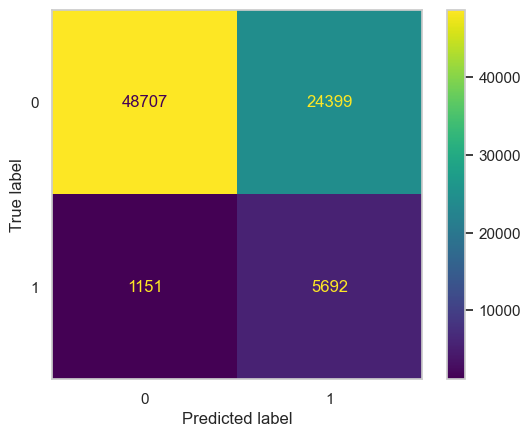

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=svc_model_tuned, X=X_test_transformed_new, y=y_test_new)
plt.grid()

Using the SVC() with tuned hyperparameters, the performance now at 0.83 recall.

<module 'matplotlib.pyplot' from 'c:\\Users\\CM\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

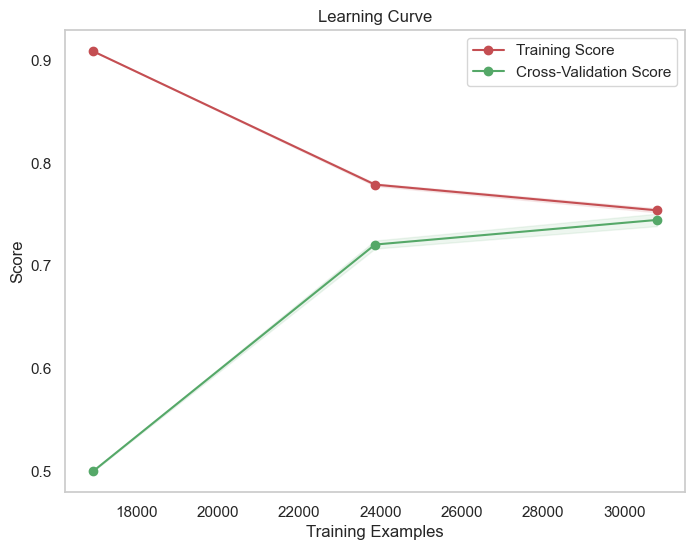

In [ ]:
plot_learning_curve(svc_model_tuned, X_train_transformed_rus_new, y_train_transformed_rus_new, cv=4, n_jobs=-1)

Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', LR), ('rf', RFC),('xgb',XGB), ('svc',svc_clf_tuned)],
    voting='hard'
)

voting_clf.fit(X_train_transformed_rus_new, y_train_transformed_rus_new)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=N...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('svc', SVC(C=0.1, gamma=1, random_state=42))])

In [ ]:
test_model(voting_clf, X_test_transformed_new, y_test_new)

{'accuracy': [0.750578493789791],
 'precision': [0.224808807462812],
 'recall': [0.7818208388133859],
 'f1': [0.3492053131425215]}

## Deep Learning Keras Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)

# to make the output stable
tf.random.set_seed(42)

2.13.0


In [ ]:
n_classes = len(np.unique(y))
n_inputs = X_train_transformed_rus_new.shape[1]
print("X_train shape:", X_train_transformed_rus_new.shape)
print("X_test shape:", X_test_transformed_new.shape)
print("y_train shape:", y_train_transformed_rus_new.shape)
print("y_test shape:", y_test_new.shape)
print("n_inputs:", n_inputs)
print("n_classes:", n_classes)

X_train shape: (41060, 29)
X_test shape: (79949, 29)
y_train shape: (41060,)
y_test shape: (79949,)
n_inputs: 29
n_classes: 2


In [ ]:
# Clear the session (similar to tf.reset_default_graph)
K.clear_session()

# Initialize model
model = keras.Sequential()

# Adds a densely-connected layer with 32 units to the model. Specify the input_shape for the first layer!
model.add(keras.layers.Dense(units=17, input_shape=(X_train_transformed_rus_new.shape[1],),kernel_initializer='he_normal'))
model.add(BatchNormalization())  # Batch Normalization after the Dense layer
model.add(tf.keras.layers.Activation('elu'))

# Add another:
model.add(keras.layers.Dense(units=32,kernel_initializer='he_normal'))
model.add(BatchNormalization())  # Batch Normalization after the Dense layer
model.add(tf.keras.layers.Activation('elu'))

# Add another:
model.add(keras.layers.Dense(units=32,kernel_initializer='he_normal'))
model.add(BatchNormalization())  # Batch Normalization after the Dense layer
model.add(tf.keras.layers.Activation('elu'))

# Add a sigmoid layer with 1 output units for binary classification:
model.add(keras.layers.Dense(units=1, activation='sigmoid',kernel_initializer='he_normal'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                510       
                                                                 
 batch_normalization (Batch  (None, 17)                68        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 17)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                576       
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print(model.inputs)
print(model.outputs)
model.summary()

[<KerasTensor: shape=(None, 29) dtype=float32 (created by layer 'dense_input')>]
[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                510       
                                                                 
 batch_normalization (Batch  (None, 17)                68        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 17)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                576       
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)              

In [ ]:
model.fit(X_train_transformed_rus_new, y_train_transformed_rus_new, epochs=50, batch_size=1000, validation_data=(X_test_transformed_new, y_test_new), verbose=1, callbacks=[early_stopping])

Epoch 1/50
42/42 [==============================] - 1s 7ms/step - loss: 0.6112 - accuracy: 0.6688 - val_loss: 0.9511 - val_accuracy: 0.3213
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.7446 - val_loss: 0.9098 - val_accuracy: 0.4282
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7536 - val_loss: 0.7694 - val_accuracy: 0.5424
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7573 - val_loss: 0.6560 - val_accuracy: 0.6291
Epoch 5/50
42/42 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7604 - val_loss: 0.6176 - val_accuracy: 0.6560
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.7608 - val_loss: 0.5528 - val_accuracy: 0.7072
Epoch 7/50
42/42 [==============================] - 0s 9ms/step - loss: 0.4965 - accuracy: 0.7606 - val_loss: 0.5462 - val_accuracy: 0.7091
Epoch 8/50
42/42 [==

In [ ]:
results  = model.history.history
results.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

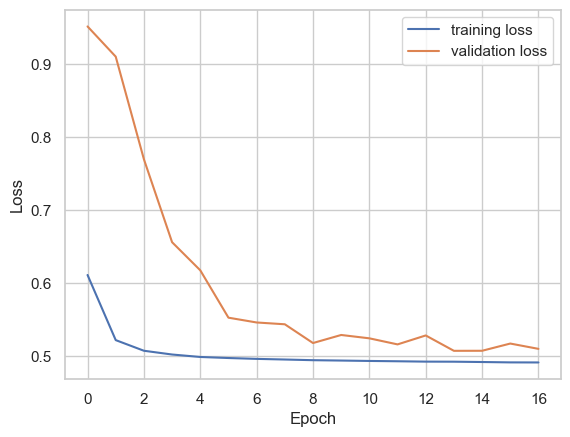

In [ ]:
# Plot loss values
plt.plot(results['loss'], label='training loss')
plt.plot(results['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


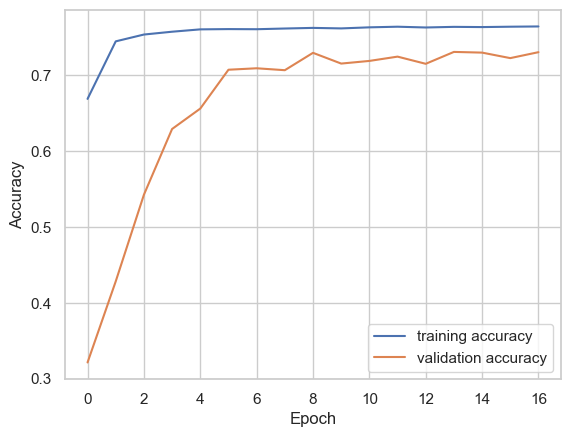

In [ ]:
# Plot accuracy values
plt.plot(results['accuracy'], label='training accuracy')
plt.plot(results['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred_proba = model.predict(X_test_transformed_new)  # Predict probabilities
y_pred = np.round(y_pred_proba).astype(int)  # Convert probabilities to binary class labels

print(f"accuracy_score: {accuracy_score(y_test_new, y_pred)}")
print(f"precision_score: {precision_score(y_test_new, y_pred)}")
print(f"recall_score: {recall_score(y_test_new, y_pred)}")
print(f"f1_score: {f1_score(y_test_new, y_pred)}")

2499/2499 [==============================] - 1s 562us/step
accuracy_score: 0.7307033233686475
precision_score: 0.21473798702559918
recall_score: 0.8078328218617565
f1_score: 0.33928681028662616


Interestingly, the deep learning model did almost same performance that of other simpler models including SVC. It seems our model learns all it can from the data very quickly and can't perform any higher. It may be limited by the complexity of the data and some more feature engineering may be required to boost the model's performance.